In [1]:
import numpy as np
import pandas as pd
import matplotlib as matplt
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
container_meta_columns = ['container_id', 'machine_id', 'time_stamp', 'app_du', 'status',
                               'cpu_request', 'cpu_limit', 'mem_size']
container_usage_columns = ['container_id', 'machine_id', 'time_stamp', 'cpu_util_percent', 'mem_util_percent', 'cpi', 'mem_gps',
                               'mpki', 'net_in', 'net_out', 'disk_io_percent']

In [3]:
file =   open('data\container_usage.csv', 'r', encoding='utf-8')
data = pd.read_csv(file)
df = pd.DataFrame(data)
df.columns = container_usage_columns
df

,container_id,machine_id,time_stamp,cpu_util_percent,mem_util_percent,cpi,mem_gps,mpki,net_in,net_out,disk_io_percent
0,NaN,m_108,698570,14,64,1.56,0.00,0.0,0.0,0.00,4.0
1,NaN,m_108,698620,12,64,1.46,0.03,0.0,0.0,0.00,4.0
2,NaN,m_108,698670,10,64,1.74,0.00,0.0,0.0,0.00,5.0
3,NaN,m_108,699740,7,65,1.57,0.02,0.0,0.0,0.00,6.0
4,NaN,m_108,700010,8,64,1.90,0.00,0.0,0.0,0.00,4.0
...,...,...,...,...,...,...,...,...,...,...,...
99996,c_10097,m_1596,731090,4,100,1.19,0.00,0.0,0.1,0.12,14.0
99997,c_10097,m_1596,731210,5,99,1.37,0.00,1.0,0.1,0.12,11.0
99998,c_10097,m_1596,731580,5,99,1.50,0.00,1.0,0.1,0.12,15.0
99999,c_10097,m_1596,731960,4,99,1.65,0.00,1.0,0.1,0.12,19.0


In [4]:
df=df.dropna()
df

,container_id,machine_id,time_stamp,cpu_util_percent,mem_util_percent,cpi,mem_gps,mpki,net_in,net_out,disk_io_percent
4198,c_1,m_2556,554700,44,94,0.98,0.64,0.0,1.54,1.55,16.0
4199,c_1,m_2556,554750,43,94,1.10,1.01,0.0,1.54,1.55,16.0
4202,c_1,m_2556,557230,54,94,1.55,0.03,0.0,1.55,1.55,14.0
4203,c_1,m_2556,557460,69,94,1.51,0.05,0.0,1.55,1.55,13.0
4204,c_1,m_2556,557490,67,95,1.32,1.14,0.0,1.55,1.55,13.0
...,...,...,...,...,...,...,...,...,...,...,...
99996,c_10097,m_1596,731090,4,100,1.19,0.00,0.0,0.10,0.12,14.0
99997,c_10097,m_1596,731210,5,99,1.37,0.00,1.0,0.10,0.12,11.0
99998,c_10097,m_1596,731580,5,99,1.50,0.00,1.0,0.10,0.12,15.0
99999,c_10097,m_1596,731960,4,99,1.65,0.00,1.0,0.10,0.12,19.0


In [5]:
grp = df[['time_stamp', 'container_id', 'mem_util_percent']].groupby('mem_util_percent')

In [6]:
mean_grp = grp.mean()
max_grp = grp.max()
min_grp = grp.min()
mean_cpu_usage_by_timestamp = mean_grp['time_stamp']
max_cpu_usage_by_timestamp = max_grp['time_stamp']
min_cpu_usage_by_timestamp = min_grp['time_stamp']

In [7]:

grp.head()

,time_stamp,container_id,mem_util_percent
4198,554700,c_1,94
4199,554750,c_1,94
4202,557230,c_1,94
4203,557460,c_1,94
4204,557490,c_1,95
...,...,...,...
45830,640590,c_10041,18
45831,641850,c_10041,18
45832,642060,c_10041,18
45833,642250,c_10041,18


In [8]:
mean_cpu_usage_by_timestamp

mem_util_percent
4      665441.608833
5      698896.000000
14     577055.625000
15     664165.751295
16     650167.062500
           ...      
96     651178.973941
97     654104.444444
98     658153.625378
99     664875.201794
100    662896.810915
Name: time_stamp, Length: 89, dtype: float64

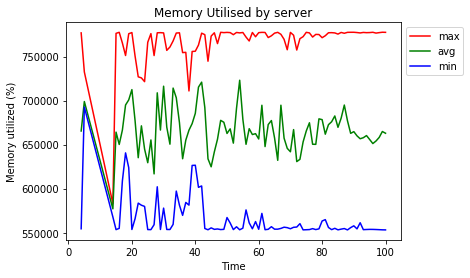

In [9]:
index=max_grp.index
plt.plot(index, max_cpu_usage_by_timestamp, color='red', label='max')
plt.plot(index, mean_cpu_usage_by_timestamp, color='green', label='avg', )
plt.plot(index, min_cpu_usage_by_timestamp, 'b', label='min')
plt.legend(bbox_to_anchor=[1, 1])
plt.title('Memory Utilised by server')
plt.xlabel('Time')
plt.ylabel('Memory utilized (%)')
plt.show()

In [10]:
machine_usage_columns = ['machine_id', 'time_stamp', 'cpu_util_percent', 'mem_util_percent', 'mem_gps',
                               'mpki', 'net_in', 'net_out', 'disk_io_percent']

In [11]:
file =   open('data\machine_usage.csv', 'r', encoding='utf-8')
data_machine = pd.read_csv(file)
df_machine = pd.DataFrame(data_machine)
df_machine.columns = machine_usage_columns
df_machine

,machine_id,time_stamp,cpu_util_percent,mem_util_percent,mem_gps,mpki,net_in,net_out,disk_io_percent
0,m_1932,386670,43,92,NaN,NaN,43.04,33.08,5
1,m_1932,386690,44,92,NaN,NaN,43.05,33.08,5
2,m_1932,386800,46,92,NaN,NaN,43.05,33.08,3
3,m_1932,386930,44,93,NaN,NaN,43.05,33.09,4
4,m_1932,387000,41,93,NaN,NaN,43.05,33.09,4
...,...,...,...,...,...,...,...,...,...
99996,m_1947,187600,35,86,NaN,NaN,44.17,35.89,6
99997,m_1947,187830,35,88,NaN,NaN,44.17,35.89,4
99998,m_1947,187870,39,88,NaN,NaN,44.17,35.89,3
99999,m_1947,187890,34,88,NaN,NaN,44.17,35.89,3


In [12]:
df_machine_cpu = df_machine.pivot(index='machine_id', columns='time_stamp', values='cpu_util_percent')
df_machine_mem = df_machine.pivot(index='machine_id', columns='time_stamp', values='mem_util_percent')

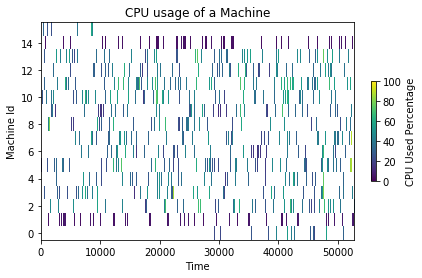

In [13]:
norm = matplt.colors.Normalize(vmin=0, vmax=100) 
im = plt.imshow(df_machine_cpu, interpolation='none', aspect='auto', norm=norm)
plt.gca().invert_yaxis()

plt.colorbar(im, fraction=0.015, pad=0.05).ax.set_ylabel('CPU Used Percentage')
plt.title('CPU usage of a Machine')
plt.xlabel('Time')
plt.ylabel('Machine Id')
plt.show()


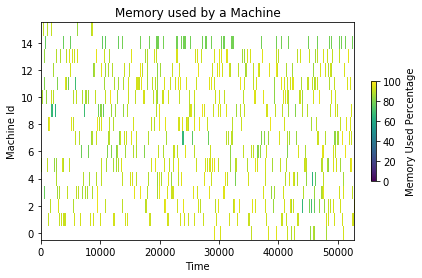

In [14]:
norm = matplt.colors.Normalize(vmin=0, vmax=100) 
im = plt.imshow(df_machine_mem, interpolation='none', aspect='auto', norm=norm)
plt.gca().invert_yaxis()

plt.colorbar(im, fraction=0.015, pad=0.05).ax.set_ylabel('Memory Used Percentage')
plt.title('Memory used by a Machine')
plt.xlabel('Time')
plt.ylabel('Machine Id')
plt.show()